# Deteccion de caracteristicas identitarias de nuestros grupos de vino

Como indica el nombre de este notebook en el vamos a intentar detectar las caracterstiscas que hacen distivos al vino de calidad con el vino que no tiene calidad esto permitira dar a la empresa informacion clara y le permitira gestionar sus recursos en pro de crear vinos cada ves mejores

Quiero recalcar algo anteriormente creamos un algoritmo de bosques aleatorios y analizamos las carateristicas a nivel general de las variables de nuestro dataset todo con el fin de llegar a este punto y ser capaz de caracterizar los 2 grupos correctamente

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

df_wine = pd.read_csv("dataset/wine_ready.csv")
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Vamos a hacer un pequeño pero necesario cambio para este notebook con fines de que quede lo mejor posible nuestro analisis para detectar las caracteristicas identitarias de nuestros vinos

Vamos a cambiar la columna quality_binary para que 0 = 'Vino de baja calidad' y 1 = 'Vino de alta calidad'; todo esto con la finalidad de hacer la caracterizacion de grupos los mas didactica posible

In [5]:
# Renombramos los valores de la columna 'quality_binary'
df_wine['quality_binary'] = df_wine['quality_binary'].replace({0: 'Vino de baja calidad', 1: 'Vino de alta calidad'})

# Convertimos la columna a tipo categórico
df_wine['quality_binary'] = df_wine['quality_binary'].astype('category')


In [4]:
# Mostramos las primeras filas y la información del DataFrame para confirmar los cambios
print("DataFrame con la columna 'quality_binary' modificada:")
df_wine.head()

DataFrame con la columna 'quality_binary' modificada:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Vino de baja calidad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Vino de baja calidad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Vino de baja calidad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Vino de alta calidad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Vino de baja calidad


In [6]:
print("\nInformación del DataFrame:")
print(df_wine.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality_binary        1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.2 KB
None


Ahora veremos un codigo que nos ayudara a identificar las caracteriscas que diferencian los vinos de alta calidad con los de baja calidad y para asegurar el existo en nuestros resultados aplicaremos la prueba Man Whiney U para asegurarnos de que las difenrecias observadas son significativas y por tanto distintivas de un grupo determinado

Variables con diferencias estadísticamente significativas (p < 0.05):
------------------------------------------------------------
- fixed acidity
- volatile acidity
- citric acid
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- sulphates
- alcohol




C:\Users\delhy.py\AppData\Local\Temp\ipykernel_9448\2320531795.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_binary', y=var, data=df_wine, palette=colors)


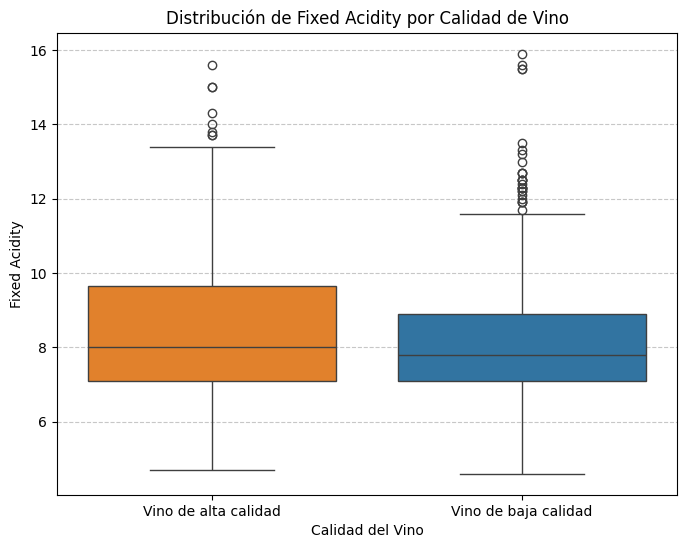

------------------------------------------------------------
La mediana de la característica 'fixed acidity' es mayor en los vinos de alta calidad.
------------------------------------------------------------


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_9448\2320531795.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_binary', y=var, data=df_wine, palette=colors)


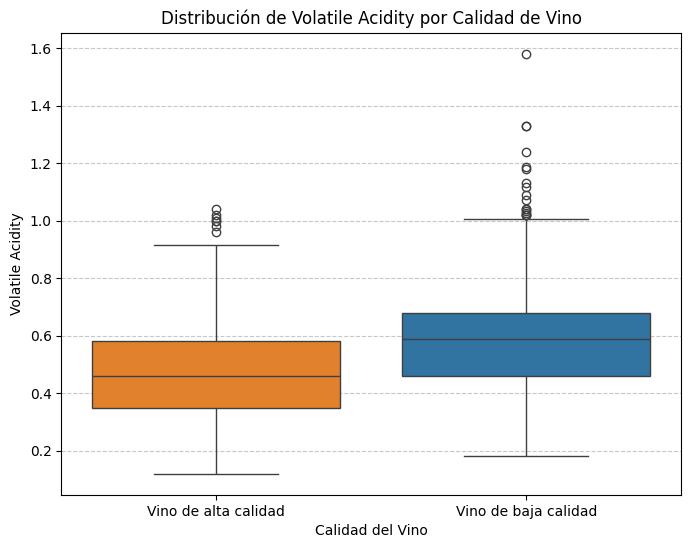

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_9448\2320531795.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_binary', y=var, data=df_wine, palette=colors)


------------------------------------------------------------
La mediana de la característica 'volatile acidity' es mayor en los vinos de baja calidad.
------------------------------------------------------------


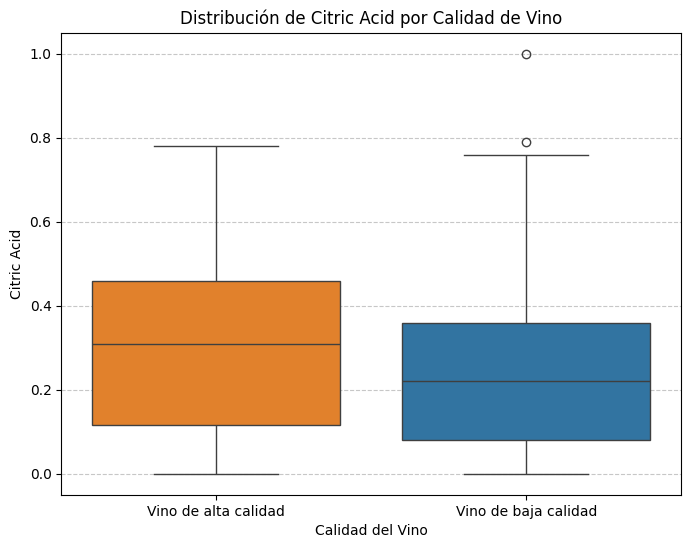

------------------------------------------------------------
La mediana de la característica 'citric acid' es mayor en los vinos de alta calidad.
------------------------------------------------------------


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_9448\2320531795.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_binary', y=var, data=df_wine, palette=colors)


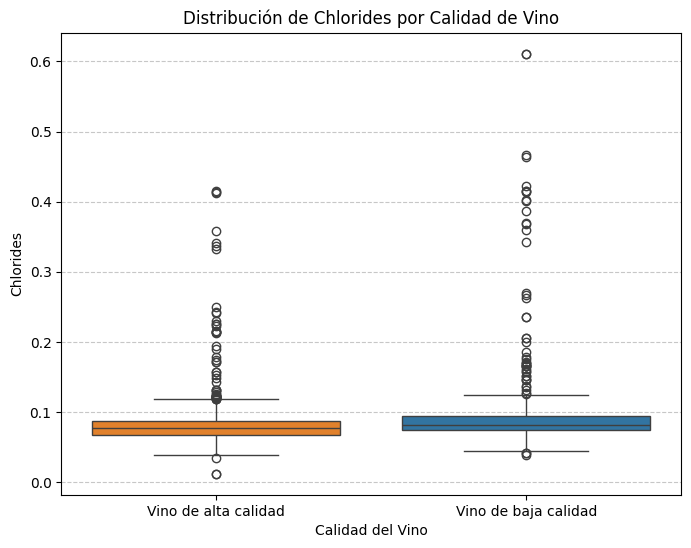

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_9448\2320531795.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_binary', y=var, data=df_wine, palette=colors)


------------------------------------------------------------
La mediana de la característica 'chlorides' es mayor en los vinos de baja calidad.
------------------------------------------------------------


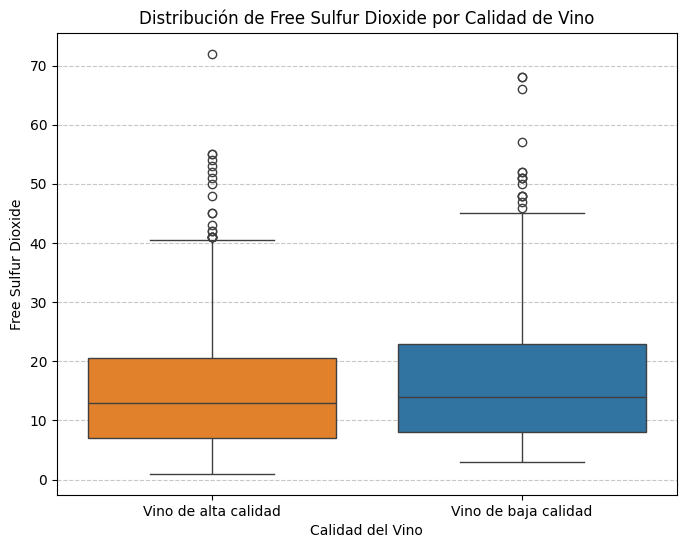

------------------------------------------------------------
La mediana de la característica 'free sulfur dioxide' es mayor en los vinos de baja calidad.
------------------------------------------------------------


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_9448\2320531795.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_binary', y=var, data=df_wine, palette=colors)


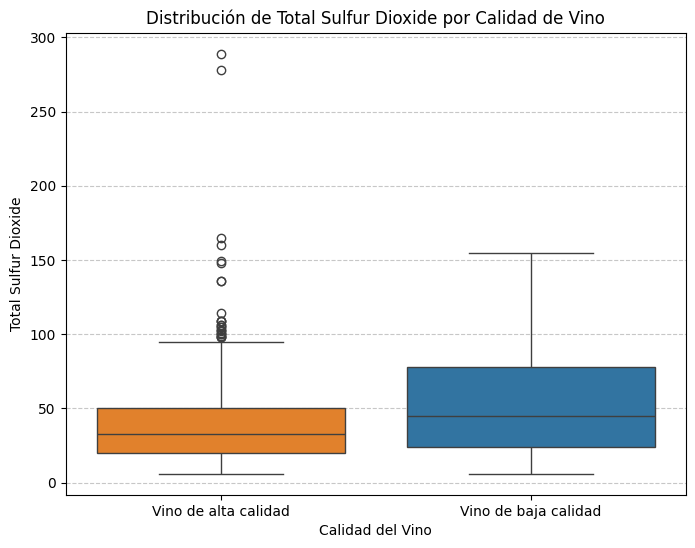

------------------------------------------------------------
La mediana de la característica 'total sulfur dioxide' es mayor en los vinos de baja calidad.
------------------------------------------------------------


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_9448\2320531795.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_binary', y=var, data=df_wine, palette=colors)


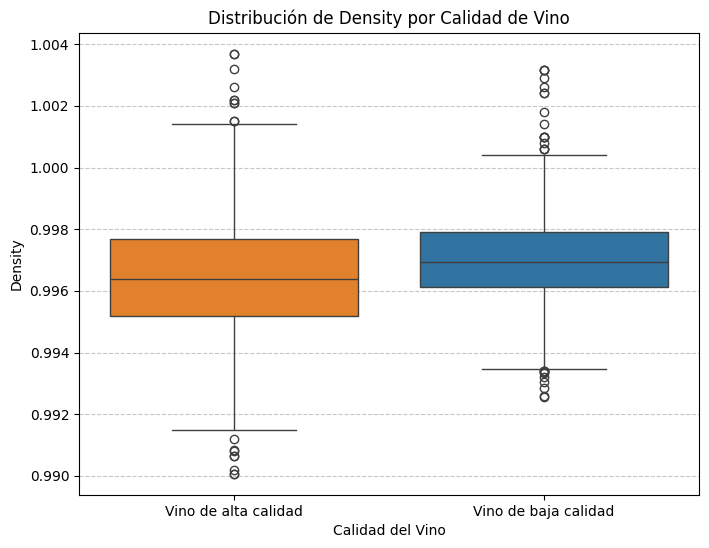

------------------------------------------------------------
La mediana de la característica 'density' es mayor en los vinos de baja calidad.
------------------------------------------------------------


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_9448\2320531795.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_binary', y=var, data=df_wine, palette=colors)


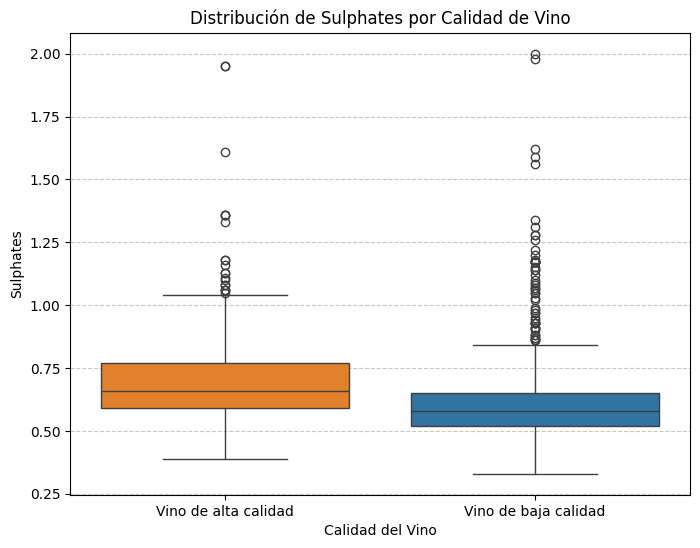

------------------------------------------------------------
La mediana de la característica 'sulphates' es mayor en los vinos de alta calidad.
------------------------------------------------------------


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_9448\2320531795.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_binary', y=var, data=df_wine, palette=colors)


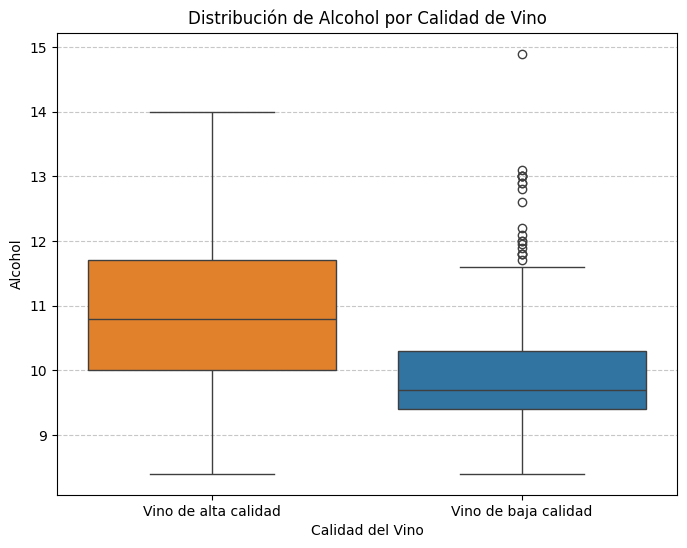

------------------------------------------------------------
La mediana de la característica 'alcohol' es mayor en los vinos de alta calidad.
------------------------------------------------------------


In [9]:
# Cargamos el dataset y preparamos la columna de calidad
df_wine = pd.read_csv("dataset/wine_ready.csv")
df_wine['quality_binary'] = df_wine['quality_binary'].replace({0: 'Vino de baja calidad', 1: 'Vino de alta calidad'})
df_wine['quality_binary'] = df_wine['quality_binary'].astype('category')

# Separamos las variables numéricas y la variable categórica de calidad
numerical_cols = df_wine.select_dtypes(include=np.number).columns.tolist()
calidad_alta = df_wine[df_wine['quality_binary'] == 'Vino de alta calidad']
calidad_baja = df_wine[df_wine['quality_binary'] == 'Vino de baja calidad']

# Lista para almacenar las variables con diferencias significativas
significant_variables = []

# Nivel de significancia
alpha = 0.05

# Realizamos la prueba de Mann-Whitney U para cada variable numérica
for col in numerical_cols:
    stat, p_value = mannwhitneyu(calidad_alta[col], calidad_baja[col])
    
    if p_value < alpha:
        significant_variables.append(col)

# Impresión de resultados
print("Variables con diferencias estadísticamente significativas (p < 0.05):")
print("-" * 60)
for var in significant_variables:
    print(f"- {var}")

print("\n")

# Colores para los gráficos
colors = ['#ff7f0e', '#1f77b4'] # Naranja y azul

# Graficamos las variables con diferencias significativas y añadimos la interpretación
for var in significant_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality_binary', y=var, data=df_wine, palette=colors)
    plt.title(f'Distribución de {var.replace("_", " ").title()} por Calidad de Vino')
    plt.xlabel('Calidad del Vino')
    plt.ylabel(var.replace("_", " ").title())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    # Obtenemos los valores medianos de cada grupo para la comparación
    median_alta = calidad_alta[var].median()
    median_baja = calidad_baja[var].median()
    
    # Imprimimos la conclusión textual
    print("-" * 60)
    if median_alta > median_baja:
        print(f"La mediana de la característica '{var.replace('_', ' ')}' es mayor en los vinos de alta calidad.")
    else:
        print(f"La mediana de la característica '{var.replace('_', ' ')}' es mayor en los vinos de baja calidad.")
    print("-" * 60)

---
#### Resumen 
--- 

<b>Los vinos de alta calidad</b>:

1. Presentan una mayor acidez fija
2. Tienen mayores catidades de ácido cítrico
3. Presentan mayor cantidad de sulfatos
4. Tienen una mayor concentracion de alcohol

---

<b>Los vinos de baja calidad</b>:

1. Presentan una mayor acidez volátil
2. Tienen mayor cantidad de cloruros
3. Presentan mayores cantidades de dióxido de azufre libre y dióxido de azufre total
4. Tienen mayor densidad

---

<b>Caracteristica comunes</b>:

1. Tanto los vinos de alta calidad como los de baja calidad tienden a tener el pH y los azucares residuales similares

---